# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Есть данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Задачи:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

Чтобы не путаться, сделаем несколько импортов

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

In [2]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

Загрузим данные: обучающий датасет, тестовый и совмещенный для проверки

In [5]:
train_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv', index_col='date')
test_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv',  index_col='date')
full_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv',  index_col='date')

Просмотрим данные

In [6]:
train_data.head(10)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,-400.599524,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,-399.353521,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,-400.556601,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,-399.968583,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948


In [7]:
train_data.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


В концентрациях металлов на вход присутствуют нули, что странно, в дальнейшем это будет убрано

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 2016-01-15 00:00:00 to 2017-12-09 13:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               14579 non-null  float64
 1   rougher.input.feed_ag                               14579 non-null  float64
 2   rougher.input.feed_pb                               14507 non-null  float64
 3   rougher.input.feed_sol                              14502 non-null  float64
 4   rougher.input.feed_rate                             14572 non-null  float64
 5   rougher.input.feed_size                             14478 non-null  float64
 6   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 7   rougher.input.floatbank10_xanthate                  14572 non-null  float64
 8   rougher.state.floatbank10_a_air                  

Все данные числовые, присутствует небольшое количество пропусков, их стоит заполнить

In [9]:
test_data.head(10)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,-300.283401,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
2017-12-09 19:59:59,5.848338,6.234198,4.468803,37.816555,547.515088,85.875864,8.040386,7.500718,1201.408796,-299.647294,...,22.977833,-499.910098,20.000113,-500.584093,18.003899,-500.326371,12.978611,-499.966502,19.988673,-500.742891
2017-12-09 20:59:59,6.172839,6.213598,4.458071,36.829223,518.363800,73.426294,7.641859,7.498470,1198.551240,-300.152108,...,22.964590,-500.083299,20.010567,-500.545746,18.040164,-498.936442,12.988702,-499.985412,20.014155,-499.443855
2017-12-09 21:59:59,5.743825,6.264367,4.428267,37.170131,500.494798,75.915232,7.230213,7.496599,1201.172468,-300.089700,...,23.010484,-500.498525,20.043525,-499.701442,17.991164,-500.324632,13.000809,-500.181711,20.001605,-500.229965
2017-12-09 22:59:59,5.558520,6.167472,4.370640,37.356892,540.990643,79.668503,7.089240,7.524634,1195.305111,-300.229149,...,22.979813,-500.451722,19.995022,-500.415107,18.057379,-499.238503,13.011922,-500.067255,20.002796,-504.347015


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4832 non-null   float64
 3   rougher.input.feed_sol                      4838 non-null   float64
 4   rougher.input.feed_rate                     4856 non-null   float64
 5   rougher.input.feed_size                     4816 non-null   float64
 6   rougher.input.floatbank10_sulfate           4857 non-null   float64
 7   rougher.input.floatbank10_xanthate          4859 non-null   float64
 8   rougher.state.floatbank10_a_air             4859 non-null   float64
 9   rougher.state.floatbank10_a_level           4859 non-null

In [11]:
test_data.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


В тестовой выборке отсутствует часть признаков, посмотрим, какие

In [12]:
set(train_data.columns).difference(set(test_data.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Это признаки, соответствующие выходным данным, логично, что их нет в датасете, где еще не произошел процесс

In [13]:
full_data.head(10)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,-400.599524,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,-399.353521,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,-400.556601,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,-399.968583,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948


Проверим расчет эффективности обогащения в данных:

In [14]:
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

In [15]:
train_data['rougher_recovery'] = (C * (F-T))/(F*(C-T))*100

In [16]:
mean_absolute_error(train_data['rougher.output.recovery'], train_data['rougher_recovery'])

9.83758577644259e-15

Ошибка практически нулевая, расчет правильный

Создадим два тренировочных датасета: один будет иметь те же столбцы, что и тестовый, для дальнейшего сравнения

In [17]:
columns = set(train_data.columns).difference(set(test_data.columns))

In [18]:
train_dataset = train_data.drop(columns, axis=1)

Заполним пропуски методом замены предыдущим значением

In [19]:
train_dataset = train_dataset.fillna(method='ffill')

In [20]:
train_dataset_2 = train_data.copy()

Проверим данные на явные дубликаты:

In [21]:
train_dataset_2.duplicated().sum()

0

Явных дубликатов нет

In [22]:
train_dataset_2 = train_dataset_2.fillna(method='ffill')

In [23]:
test_data = test_data.fillna(method='ffill')

Итог: 
- В данных нет явных дубликатов, пропуски заполнены
- Есть артефакты в виде нулевых концентраций, они будут исправлены далее
- Признаки, соответствующие выходным данным, отсутствуют в тестовом датасете
- Проверен расчет эффективности обогащения: ошибки нет

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Для этого напишем функцию, выводящую значения средней концентрации металлов на каждом из этапов и гистограммы

In [24]:
def change(metal):
    print(f'Концентрация {metal} в сырье:', full_data[f'rougher.input.feed_{metal}'].mean())
    plt.figure()
    full_data[f'rougher.input.feed_{metal}'].hist()
    plt.title(f'Концентрация {metal} в сырье')
    
    print(f'Концентрация {metal} в чероновом концентрате:', full_data[f'rougher.output.concentrate_{metal}'].mean())
    plt.figure()
    full_data[f'rougher.output.concentrate_{metal}'].hist()
    plt.title(f'Концентрация {metal} в чероновом концентрате')
    
    print(f'Концентрация {metal} в концентрате после первой очистки:', full_data[f'primary_cleaner.output.concentrate_{metal}'].mean())
    plt.figure()
    full_data[f'primary_cleaner.output.concentrate_{metal}'].hist()
    plt.title(f'Концентрация {metal} в концентрате после первой очистки')
    
    print(f'Концентрация {metal} в финальном концентрате:', full_data[f'final.output.concentrate_{metal}'].mean())
    plt.figure()
    full_data[f'final.output.concentrate_{metal}'].hist()
    plt.title(f'Концентрация {metal} в финальном концентрате')

Концентрация золота заметно увеличивается к финальному продукту, что и является целью очистки:

Концентрация au в сырье: 8.266097326589103
Концентрация au в чероновом концентрате: 19.772000139486316
Концентрация au в концентрате после первой очистки: 32.11940040787649
Концентрация au в финальном концентрате: 44.0765129419528


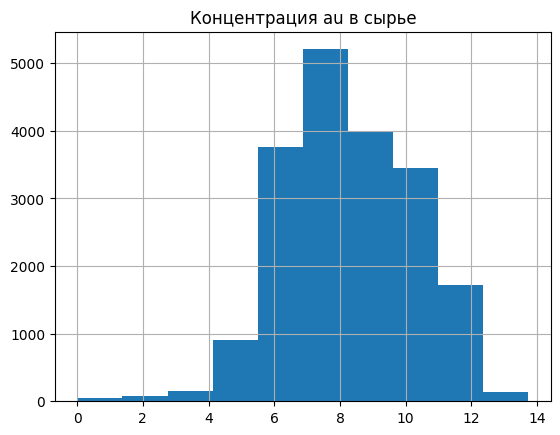

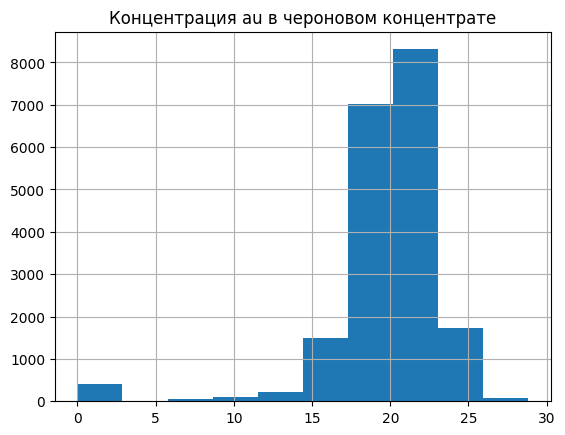

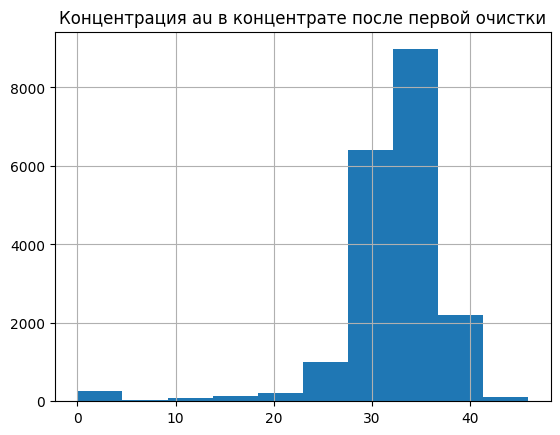

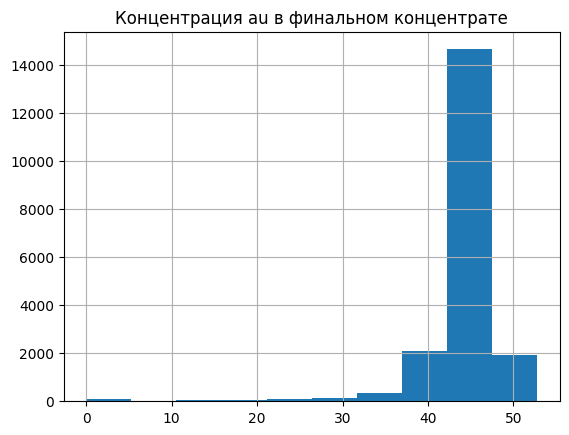

In [25]:
change('au')

Концентрация серебра уменьшается:

Концентрация ag в сырье: 8.794927425814688
Концентрация ag в чероновом концентрате: 11.994759359873429
Концентрация ag в концентрате после первой очистки: 8.442408077719058
Концентрация ag в финальном концентрате: 5.1684703736768


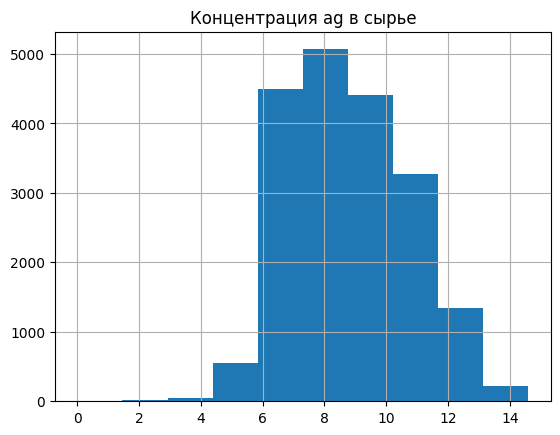

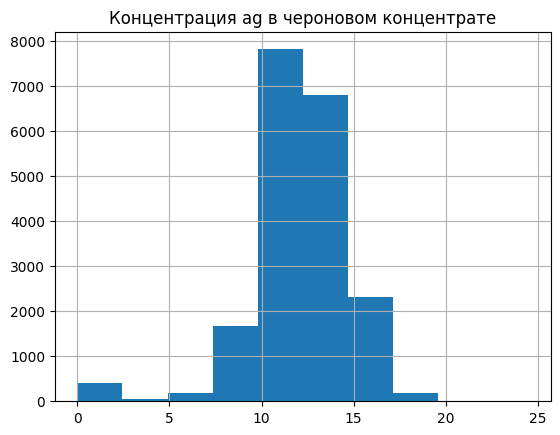

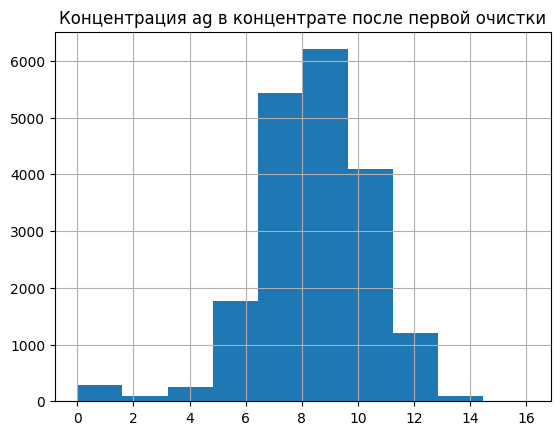

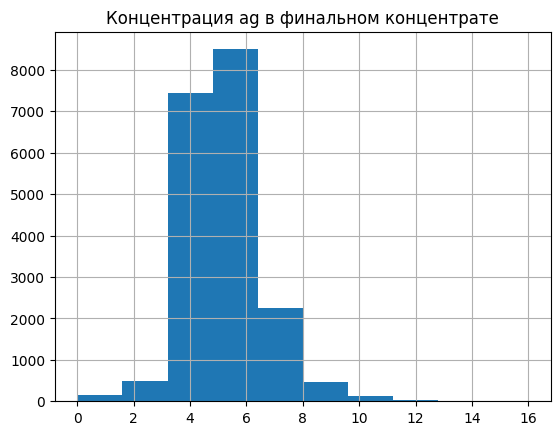

In [26]:
change('ag')

А вот концентрацию свинца понозить не удается:

Концентрация pb в сырье: 3.5980849753954622
Концентрация pb в чероновом концентрате: 7.606272313195004
Концентрация pb в концентрате после первой очистки: 9.829529774200516
Концентрация pb в финальном концентрате: 9.978894911181722


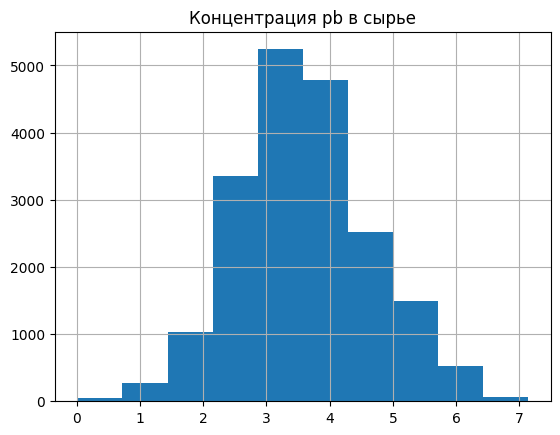

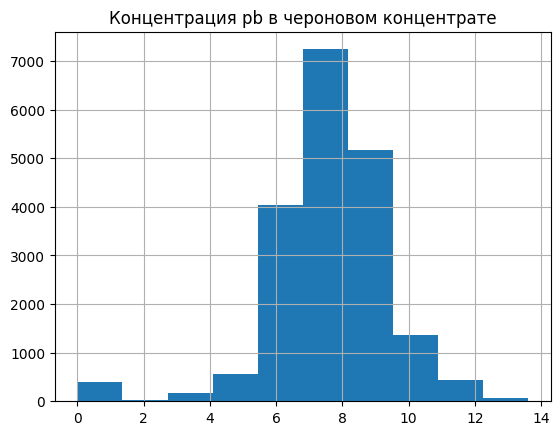

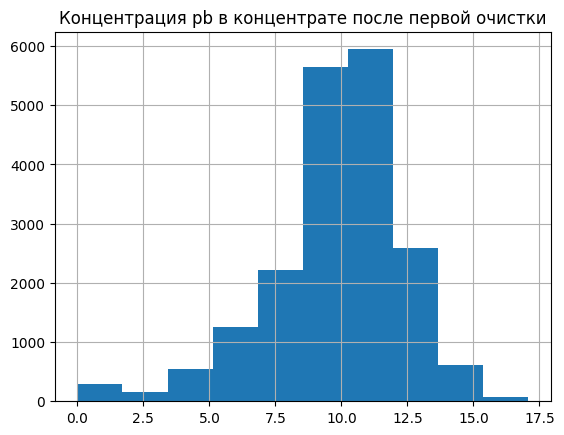

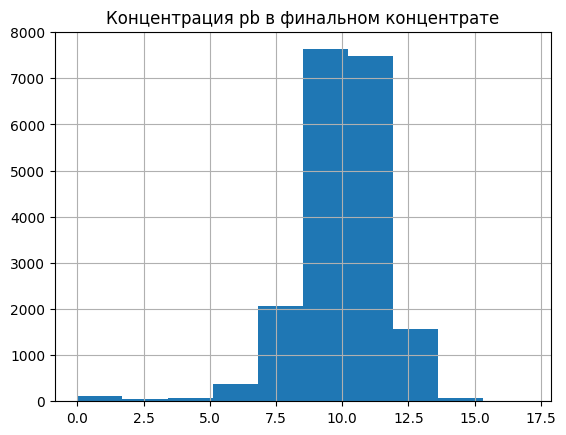

In [27]:
change('pb')

Нехватка одного металла может быть пустой рудой

Как было замечено вначале, среди концентраций присутсвуют нехарактерные нули, которые могут исказить предсказания модели, уберем их с помощью следующей функции:

In [28]:
def cleaning(metal, dataset):
    dataset = dataset.loc[dataset[f'rougher.input.feed_{metal}'] > 0.5]
    dataset = dataset.loc[dataset[f'rougher.output.concentrate_{metal}'] > 0.5]
    dataset = dataset.loc[dataset[f'primary_cleaner.output.concentrate_{metal}'] > 0.5]
    dataset = dataset.loc[dataset[f'final.output.concentrate_{metal}'] > 0.5]
    return dataset

In [29]:
train_dataset_2 = cleaning('au', train_dataset_2)
train_dataset_2 = cleaning('ag', train_dataset_2)
train_dataset_2 = cleaning('pb', train_dataset_2)

Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. 

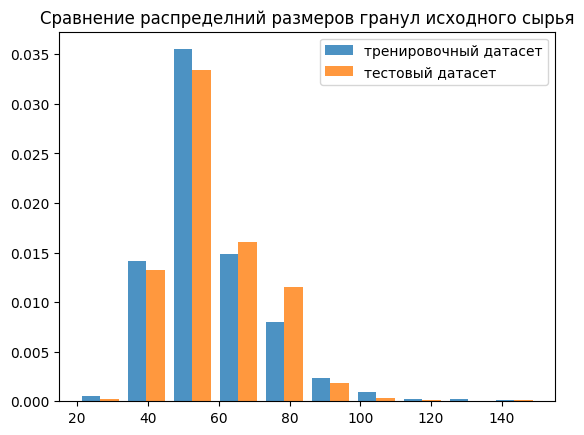

In [30]:
plt.hist(
        [train_dataset['rougher.input.feed_size'], test_data['rougher.input.feed_size']],
         alpha = 0.8, 
         density=True, 
         range=(20,150),
         label=['тренировочный датасет', 'тестовый датасет']
        )
plt.legend()
plt.title('Сравнение распределний размеров гранул исходного сырья');

In [31]:
print('Нулевая гипотеза: средние для распределений размеров гранул исходного сырья равны')
alpha = 0.05
result = ttest_ind(train_dataset['rougher.input.feed_size'], test_data['rougher.input.feed_size'])
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, редние для распределений размеров гранул исходного сырья различны')
else:
    print('Не получилось отвергнуть нулевую гипотезу, средние для распределений размеров гранул исходного сырья равны') 

Нулевая гипотеза: средние для распределений размеров гранул исходного сырья равны
p-значение: 0.8584827363512197
Не получилось отвергнуть нулевую гипотезу, средние для распределений размеров гранул исходного сырья равны


Распределения отличаются друг от друга незначительно

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате

In [32]:
full_data['rougher.input.feed_all_metals'] = full_data['rougher.input.feed_au'] + full_data['rougher.input.feed_ag'] + full_data['rougher.input.feed_pb']
full_data['rougher.output.concentrate_all_metals'] = full_data['rougher.output.concentrate_au'] + full_data['rougher.output.concentrate_ag'] + full_data['rougher.output.concentrate_pb']
full_data['primary_cleaner.output.concentrate_all_metals'] = full_data['primary_cleaner.output.concentrate_au'] + full_data['primary_cleaner.output.concentrate_ag'] + full_data['primary_cleaner.output.concentrate_pb']
full_data['final.output.concentrate_all_metals'] = full_data['final.output.concentrate_au'] + full_data['final.output.concentrate_ag'] + full_data['final.output.concentrate_pb'] 

Концентрация all_metals в сырье: 20.704123513182505
Концентрация all_metals в чероновом концентрате: 39.37303181255475
Концентрация all_metals в концентрате после первой очистки: 50.40641752207378
Концентрация all_metals в финальном концентрате: 59.22465277662749


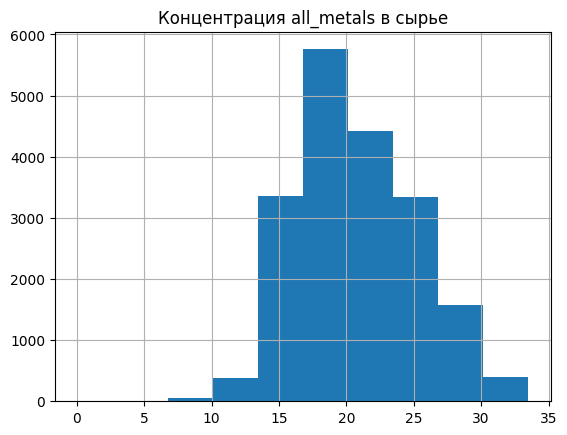

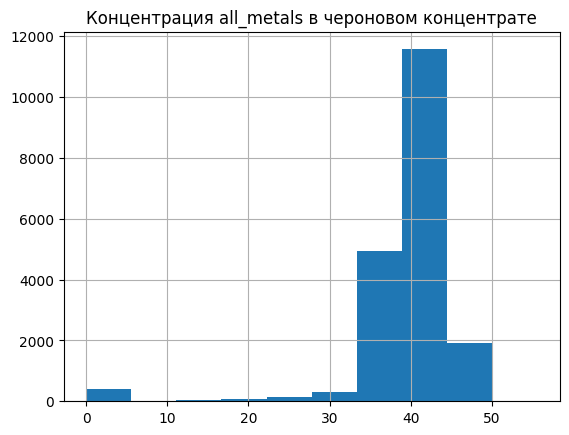

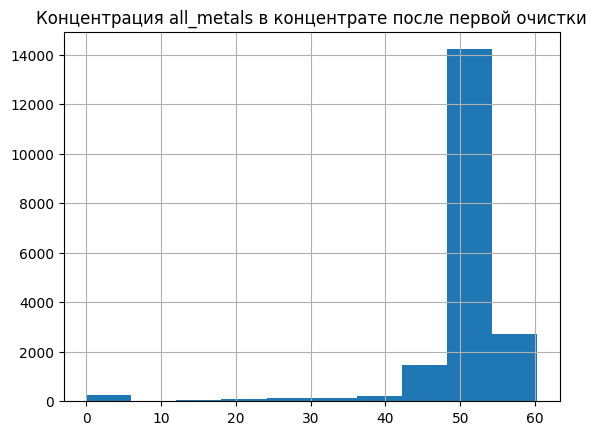

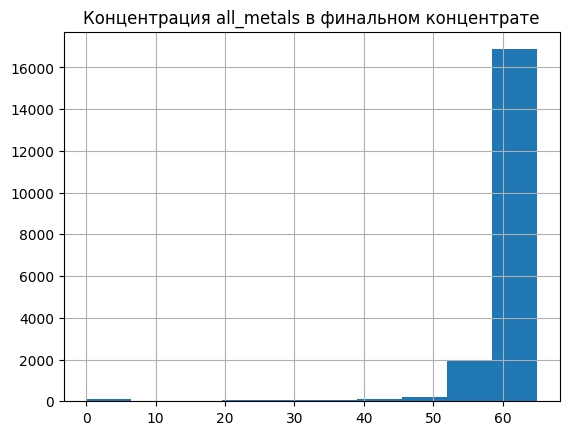

In [33]:
change('all_metals')

Концентрация металлов увеличивается за счет очистки, что и требуется

Итог:
- Концентрация золота и, соответственно, суммарная концентрация металлов увеличивается за счет очистки, что и требуется
- Концентрация примеси свинца также увеличивается
- Распределения размеров гранул исходного сырья на обучающей и тестовой выборках не отличаются, ошибки из-за этого при предсказании не будет

## Модель

Напишем функцию для вычисления sMAPE

In [34]:
def sMAPE(y_true, y_predict):
    smape = (1/len(y_true)) * (np.sum(2*np.abs(y_true-y_predict)))/(np.abs(y_true)+np.abs(y_predict))*100
    return smape.mean()

Сделаем ее оценщиком 

In [35]:
scorer = make_scorer(sMAPE, greater_is_better=False)

Напишем функцию для вычисления итогового sMAPE:

In [36]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    score = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    return score

Разделим данные на целевой признак и обучающие признаки

In [37]:
target_rougher = train_dataset_2['rougher.output.recovery']

In [38]:
target_final = train_dataset_2['final.output.recovery']

In [39]:
rougher_features = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_rate',
                   'rougher.input.feed_size', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 
                   'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate']

In [40]:
features_rougher = train_dataset_2[rougher_features]

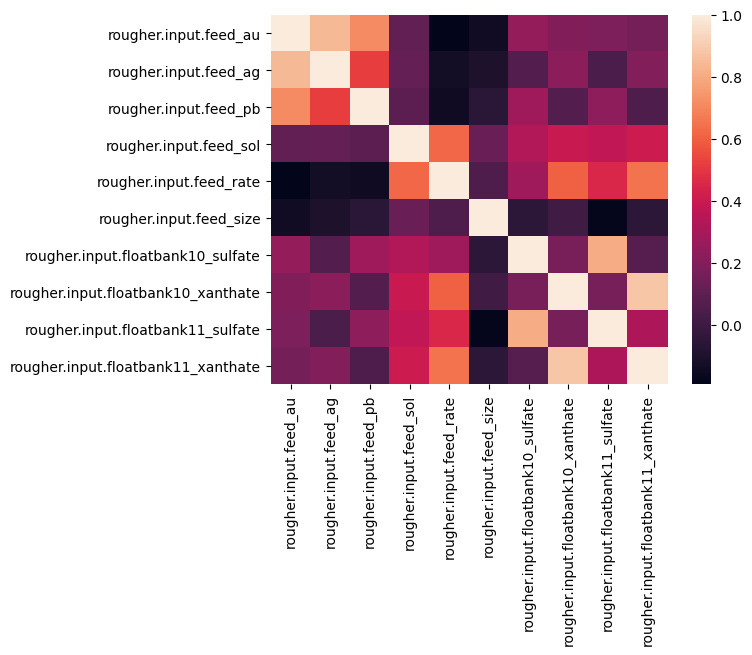

In [41]:
sns.heatmap(features_rougher.corr());

Присутствует зависимость между некоторыми признаками

In [42]:
final_features = rougher_features + ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 
                                    'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate']

In [43]:
features_final = train_dataset_2[final_features]

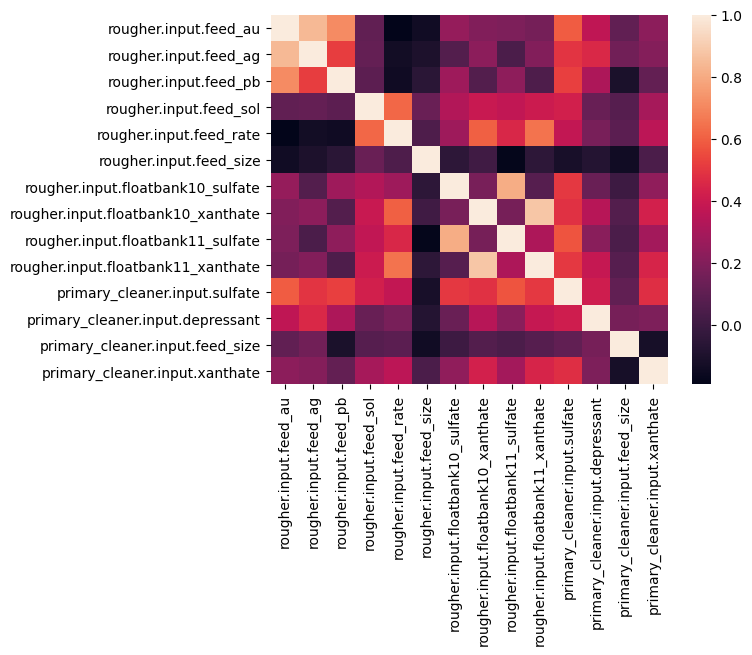

In [44]:
sns.heatmap(features_final.corr());

Аналогично и здесь

Сделаем pipeline для обучения модели для флотации

In [45]:
%%time
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("regressor", RandomForestRegressor()),
    ]
)

param_grid = [
    {
        "scaler": [StandardScaler()],
    },
    {
        "scaler": [MinMaxScaler()],
    },
    {
        "regressor": [LinearRegression()],
    },
    {
        "regressor": [KNeighborsRegressor()],
        "regressor__n_neighbors": [5, 8, 10, 15],
    },
    {
        "regressor": [RandomForestRegressor(random_state=12345)],
        "regressor__n_estimators": [50, 100, 150],
        "regressor__max_depth": [3, 5, 8],
    },
    {
        "regressor": [GradientBoostingRegressor(random_state=12345)],
        "regressor__n_estimators": [50, 100, 150],
    }
    
]

grid = GridSearchCV(pipe, param_grid=param_grid, scoring=scorer, cv=5)
grid.fit(features_rougher, target_rougher)

CPU times: total: 3min 59s
Wall time: 4min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid=[{'scaler': [StandardScaler()]},
                         {'scaler': [MinMaxScaler()]},
                         {'regressor': [LinearRegression()]},
                         {'regressor': [KNeighborsRegressor()],
                          'regressor__n_neighbors': [5, 8, 10, 15]},
                         {'regressor': [RandomForestRegressor(random_state=12345)],
                          'regressor__max_depth': [3, 5, 8],
                          'regressor__n_estimators': [50, 100, 150]},
                         {'regressor': [GradientBoostingRegressor(random_state=12345)],
                          'regressor__n_estimators': [50, 100, 150]}],
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [46]:
print(grid.best_estimator_)
print(-grid.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
6.449073481419961


В данном случае лучше использовать StandardScaler и воспользоваться LinearRegression

In [47]:
scaler_1 = StandardScaler()
features_rougher = scaler_1.fit_transform(features_rougher)
model_1 = LinearRegression()
model_1.fit(features_rougher, target_rougher)

LinearRegression()

Ошибка модели для расчета выхода после флотации менее 3-х процентов

Сделаем pipeline для обучения модели для итоговых данных

In [48]:
%%time
pipe_2 = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("regressor", RandomForestRegressor()),
    ]
)

param_grid_2 = [
    {
        "scaler": [StandardScaler()],
    },
    {
        "scaler": [MinMaxScaler()],
    },
    {
        "regressor": [LinearRegression()],
    },
    {
        "regressor": [KNeighborsRegressor()],
        "regressor__n_neighbors": [5, 8, 10, 15],
    },
    {
        "regressor": [RandomForestRegressor(random_state=12345)],
        "regressor__n_estimators": [50, 100, 150],
        "regressor__max_depth": [3, 5, 8],
    },
    {
        "regressor": [GradientBoostingRegressor(random_state=12345)],
        "regressor__n_estimators": [50, 100, 150],
    }
    
]

grid_2 = GridSearchCV(pipe_2, param_grid=param_grid_2, scoring=scorer, cv=5)
grid_2.fit(features_final, target_final)

CPU times: total: 5min 47s
Wall time: 5min 49s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid=[{'scaler': [StandardScaler()]},
                         {'scaler': [MinMaxScaler()]},
                         {'regressor': [LinearRegression()]},
                         {'regressor': [KNeighborsRegressor()],
                          'regressor__n_neighbors': [5, 8, 10, 15]},
                         {'regressor': [RandomForestRegressor(max_depth=5,
                                                              n_estimators=50,
                                                              random_state=12345)],
                          'regressor__max_depth': [3, 5, 8],
                          'regressor__n_estimators': [50, 100, 150]},
                         {'regressor': [GradientBoostingRegressor(random_state=12345)],
                          'regressor__n_estimators': [50, 100, 150]

In [49]:
print(grid_2.best_estimator_)
print(-grid_2.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=5, n_estimators=50,
                                       random_state=12345))])
8.294155400372153


В данном случае лучше всего использовать StandardScaler и RandomForestRegressor

In [50]:
scaler_2 = StandardScaler()
features_final = scaler_2.fit_transform(features_final)
model_2 = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)
model_2.fit(features_final, target_final)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)

Соединим тестовый и полный датасеты, чтобы получить данные для проверки модели

In [51]:
test_data_target = test_data.join(full_data[['rougher.output.recovery', 'final.output.recovery']])

Разделим тестовый датасет на целевой признак и признаки для предсказания (сделала плохие названия переменных)

In [52]:
rougher_target_test = test_data_target['rougher.output.recovery']
final_target_test = test_data_target['final.output.recovery']

In [53]:
rougher_features_test = test_data_target[rougher_features]
final_features_test = test_data_target[final_features]

Обработаем признаки и предскажем значения целевых признаков для тестового датасета

In [54]:
rougher_features_test = scaler_1.transform(rougher_features_test)

In [55]:
predicted_test_rougher = model_1.predict(rougher_features_test)
smape_test_1 = sMAPE(rougher_target_test, predicted_test_rougher)
print('sMAPE', smape_test_1)

sMAPE 4.935142046522735


In [56]:
final_features_test = scaler_2.transform(final_features_test)

In [57]:
predicted_test_final = model_2.predict(final_features_test)
smape_test_2 = sMAPE(final_target_test, predicted_test_final)
print('sMAPE', smape_test_2)

sMAPE 7.754546196765306


Вычислим итоговую ошибку

In [58]:
final_smape = final_sMAPE(smape_test_1, smape_test_2)
print('Итоговый sMAPE:', final_smape)

Итоговый sMAPE: 7.0496951592046635


Ошибка модели для расчета финального выхода в пределах 7-8 процентов

Проверим модели на адекватность

In [59]:
dummy_1_mean = DummyRegressor(strategy = 'mean').fit(features_rougher, target_rougher)
dummy_2_mean = DummyRegressor(strategy = 'mean').fit(features_final, target_final)
  
dummy_1_median = DummyRegressor(strategy = 'median').fit(features_rougher, target_rougher)
dummy_2_median = DummyRegressor(strategy = 'median').fit(features_final, target_final)

rougher_predict_dummy_mean = dummy_1_mean.predict(rougher_features_test)
rougher_predict_dummy_median = dummy_1_median.predict(rougher_features_test)

final_predict_dummy_mean = dummy_2_mean.predict(final_features_test)
final_predict_dummy_median = dummy_2_median.predict(final_features_test)

In [60]:
print('DummyRegressor (mean) rougher sMAPE:', sMAPE(rougher_target_test, rougher_predict_dummy_mean))
print('DummyRegressor (median) rougher sMAPE:', sMAPE(rougher_target_test, rougher_predict_dummy_median))
print('DummyRegressor (mean) final sMAPE:', sMAPE(final_target_test, final_predict_dummy_mean))
print('DummyRegressor (median) final sMAPE:', sMAPE(final_target_test, final_predict_dummy_median))

DummyRegressor (mean) rougher sMAPE: 6.0123834383747425
DummyRegressor (median) rougher sMAPE: 5.70673713379148
DummyRegressor (mean) final sMAPE: 9.038230512559775
DummyRegressor (median) final sMAPE: 8.85264756861326


Ошибки предсказаний моделей ниже, чем у DummyRegressor

Итоговая ошибка в пределах 5-6 процентов

Итог:
- Подобраны оптимальные варианты модели и обработки данных
- Обучены две модели: для предсказания выхода после флотации и для предсказания финального выхода
- Ошибка модели для расчета выхода после флотации в пределах 5 процентов
- Ошибка модели для расчета финального выхода в пределах 8 процентов
- Общая итоговая ошибка в пределах 7-8 процентов
- Ошибки моделей ниже, чем у случайных

Общий итог:
 - Данные были предварительно обработаны: убраны артефакты, заполнены пропуски
 - Исследованы зависимости для концентраций металлов на разных этапах очистки: концентрация золота и, соответственно, суммарная концентрация металлов увеличивается за счет очистки, что и требуется.Концентрация примеси свинца также увеличивается.
 - Обучены модели для предсказания выхода после флотации и для предсказания финального выхода, общая итоговая ошибка моделей в пределах 5-6 процентов